<a href="https://colab.research.google.com/github/thiagobcoelho25/ML_Deteccao_Fraude_cartao/blob/main/Thiago_Ribeiro_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
#!pip install imbalanced-learn
!pip install scikit-plot

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

In [ ]:
# aplicando estilo dos graficos do seaborn
sns.set_theme(style="dark")

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
# caminho do arquivo
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
base_fraudes_cartao = pd.read_csv(file_path)

## Análise Exploratória

O conjunto de dados do dataset , possui aproximadamente 284807 entradas com respectivamente 31 colunas. Todas as colunas do dataset são do tipo numerica e não existem entradas nulas.

In [ ]:
# conjunto original 
print(f'Dataset original possui {base_fraudes_cartao.shape[0]} entradas, com {base_fraudes_cartao.shape[1]} colunas')

Dataset original possui 284807 entradas, com 31 colunas


In [ ]:
# tipos das colunas
base_fraudes_cartao.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# porcentagem dos valores ausentes
print(base_fraudes_cartao.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Podemos ver com o metodo `describe()` as 5 primeiras entradas no dataset. Percebemos que com as 28 colunas iniciais $[V1, V2, V3 \dots, V28]$ que sofreram transformação de PCA, o dataset possui mais 3 colunas, sendo elas:
* `Amount`: Valor corenpondente a compra com o cartão
* `Time`: A hora que essa compra ocorreu
* `Class`: Se o tipo da compra foi classificado como:
  * **0:** Transação normal
  * **1:** Transação fraudulenta

Mais detalhes de como funciona o algoritmo de PCA podem ser encontrados neste [link](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

In [ ]:
# 5 primeiras entradas
base_fraudes_cartao.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Com um resumo estatistico das colunas conseguimos notar que:
* O atributo Amount apresenta a presença de outliers, alem de possuir transações com valores de zero.
* Percebemos tambem que os atributos `Amount` e `Time` não estão em uma mesma ordem de grandeza com os outros atributos, sendo nescessario sua normalização.

In [ ]:
# resumo estatístico
base_fraudes_cartao.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


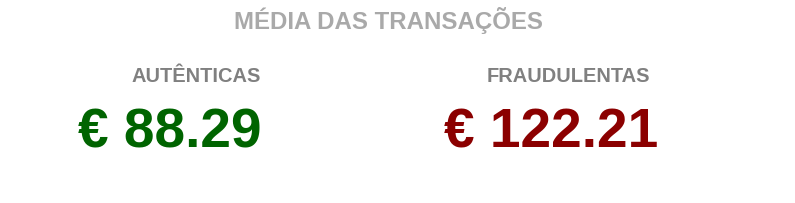

In [ ]:
# Média das transações
media_autentica = base_fraudes_cartao['Amount'][base_fraudes_cartao['Class']==0].mean()
media_fraude    = base_fraudes_cartao['Amount'][base_fraudes_cartao['Class']==1].mean()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 3))
fig.text(x= 0.35, y= 0.9 ,s='MÉDIA DAS TRANSAÇÕES',
        fontsize=24, color='darkgray', weight='bold')
ax1.text(x= 0.35, y= 0.7 ,s='AUTÊNTICAS',
        fontsize=20, color='gray', weight='bold')
ax1.text(x= 0.2, y= 0.3 ,s=f'€ {media_autentica:.2f}', fontsize=55, color='darkgreen', weight='bold')

ax1.set_facecolor('white')
ax1.set_yticklabels([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.text(x= 0.15, y= 0.7 ,s='FRAUDULENTAS',
        fontsize=20, color='gray', weight='bold')
ax2.text(x= 0.03, y= 0.3 ,s=f'€ {media_fraude:.2f}', fontsize=55, color='darkred', weight='bold')

ax2.set_facecolor('white')
ax2.set_yticklabels([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

In [ ]:
# porcentagem de valor que cada tipo de transação representa
soma_autentica = base_fraudes_cartao['Amount'][base_fraudes_cartao['Class']==0].sum()
soma_fraude    = base_fraudes_cartao['Amount'][base_fraudes_cartao['Class']==1].sum()
max_autentica = base_fraudes_cartao['Amount'][base_fraudes_cartao['Class']==0].max()
max_fraude = base_fraudes_cartao['Amount'][base_fraudes_cartao['Class']==1].max()

print(f'Transações autênticas representam {(soma_autentica/(soma_autentica+soma_fraude)*100):.2f}% do valor total das transações')
print(f'Transação autêntica de maior valor é de € {max_autentica:.2f}')
print(f'Transação fraudulenta de maior valor é de € {max_fraude:.2f}')

Transações autênticas representam 99.76% do valor total das transações
Transação autêntica de maior valor é de € 25691.16
Transação fraudulenta de maior valor é de € 2125.87


O dataset possui um grande desequilibrio com relação a quantidade de entradas fraudulentas e autênticas, sendo que as entradas com `Class` iagual a 1, ou seja fraudulentas representão aproximadamente 0.1727% do conjunto de dados. Para o trabalho de classificação utilizando *Machine Learning* sera nescessario a utilização de tecnicas para equilibar o dataset.

O dataset possui 284315 entradas não fraudulentas, representadas por 0
O dataset possui 492 entradas não fraudulentas, representadas por 1

Fraudes representam 0.1727% do dataset.



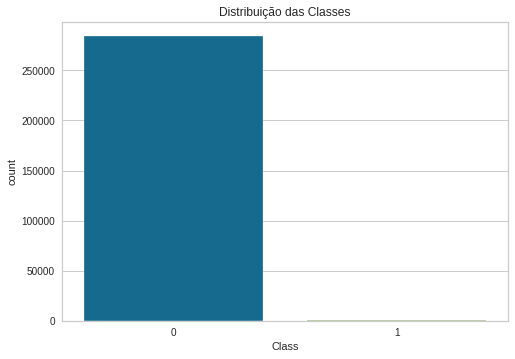

In [ ]:
# ver o balanceamento das classes
quantidade_classes_base = base_fraudes_cartao['Class'].value_counts()
print(f'O dataset possui {quantidade_classes_base[0]} entradas não fraudulentas, representadas por {quantidade_classes_base.index[0]}')
print(f'O dataset possui {quantidade_classes_base[1]} entradas não fraudulentas, representadas por {quantidade_classes_base.index[1]}');
print("\nFraudes representam {:.4f}% do dataset.\n".format((base_fraudes_cartao[base_fraudes_cartao['Class'] == 1].shape[0] / base_fraudes_cartao.shape[0]) * 100));

# histograma da quantidade de entradas para cada classe
ax = sns.countplot(x="Class", data=base_fraudes_cartao);
ax.axes.set_title('Distribuição das Classes');

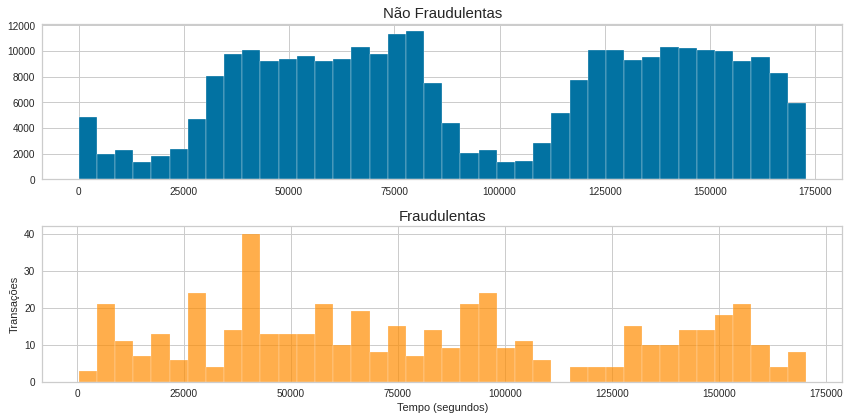

In [ ]:
# 3 em 3 horas -> [0,10800,21600,32400,43200,54000,64800,75600,86400,97200,108000,118800,129600,140400,151200,162000,172800] -> 48h
fig, (ax_com_fraudes, ax_sem_fraudes) = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

ax_com_fraudes.hist(base_fraudes_cartao[base_fraudes_cartao['Class'] == 0]['Time'], bins=40);
ax_com_fraudes.set_title("Não Fraudulentas", fontsize=15);

ax_sem_fraudes.hist(base_fraudes_cartao[base_fraudes_cartao['Class'] == 1]['Time'], bins=40, color='darkorange', alpha = 0.7);
ax_sem_fraudes.set_title("Fraudulentas", fontsize=15);

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Com relação a entradas com valores de 0, encontramos tambem um base de dados bastante desequilibrada. São 1825 registros com transações de 0, sendo 27 transações fraudulentas. Essas entradas representam apenas 0.64% do dataset. Não representando um valor muito grande com relação ao total, e não sabendo o significado desses valores, podendo ser confirmações de autenticidade do cartão, manteremos esss entradas.

Existem 1825 transações com valor(Amount) igual a zero
Sendo 27 fraudulentas



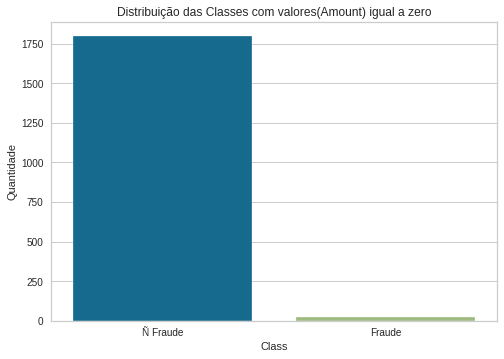

In [ ]:
base_amount_equal_zero = base_fraudes_cartao[base_fraudes_cartao['Amount'] == 0.0]
print(f'Existem {base_amount_equal_zero.shape[0]} transações com valor(Amount) igual a zero')
base_amount_equal_zero_fraud = base_amount_equal_zero[base_amount_equal_zero['Class'] == 1]
print(f'Sendo {base_amount_equal_zero_fraud.shape[0]} fraudulentas\n')

# boxplot
ax = sns.countplot(x="Class", data=base_amount_equal_zero);
ax.axes.set_title('Distribuição das Classes com valores(Amount) igual a zero');
ax.axes.set_ylabel('Quantidade');
ax.axes.set_xticklabels(labels=['Ñ Fraude', 'Fraude']);

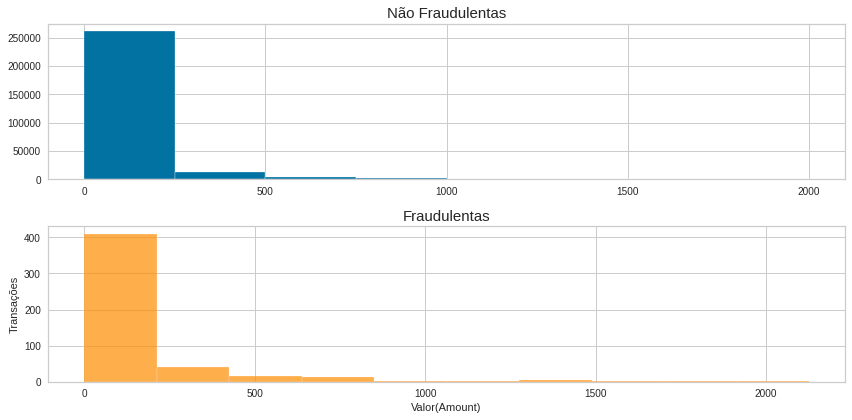

In [ ]:
# histograma para Amount
fig, (ax_com_fraudes, ax_sem_fraudes) = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

ax_com_fraudes.hist(base_fraudes_cartao[base_fraudes_cartao['Class'] == 0]['Amount'], bins=[0,250,500,750,1000,1250,1500,1750,2000]);
ax_com_fraudes.set_xticks(ticks=[0,500,1000,1500,2000])
ax_com_fraudes.set_title("Não Fraudulentas", fontsize=15);


ax_sem_fraudes.hist(base_fraudes_cartao[base_fraudes_cartao['Class'] == 1]['Amount'], color='darkorange', alpha = 0.7);
ax_sem_fraudes.set_title("Fraudulentas", fontsize=15);

plt.xlabel('Valor(Amount)')
plt.ylabel('Transações')
plt.tight_layout()

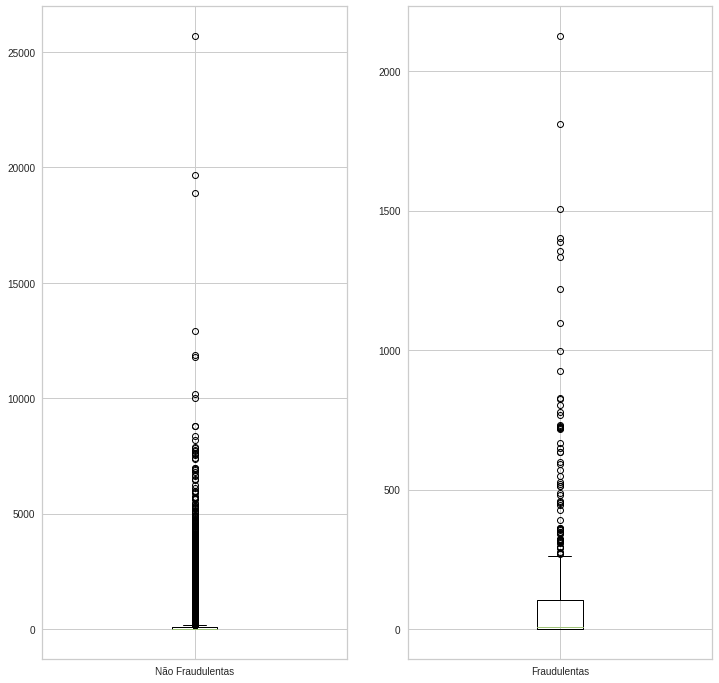

In [ ]:
# boxplot
fig, (ax_boxplot_sem_fraudes, ax_boxplot_com_fraudes) = plt.subplots(1, 2, figsize=(12,12))

ax_boxplot_sem_fraudes.boxplot(x=base_fraudes_cartao[base_fraudes_cartao['Class'] == 0]['Amount'], labels=['Não Fraudulentas']);

ax_boxplot_com_fraudes.boxplot(x=base_fraudes_cartao[base_fraudes_cartao['Class'] == 1]['Amount'], labels=['Fraudulentas']);

Plotando o histogramas e o boxplot conseguimos ver que a grande maioria das entradas no dataset possuem valores de `Amount` entre 0 e 500 para as transações autenticas e fraudulentas. Plotando inicialmente o boxplot percebemos a grande distribuição dos *outliers*, ficando até dificil de enxergar inicialmente.

Plotando novamente um boxplot, agora com uma aproximação, conseguimos ver sua distribuição.

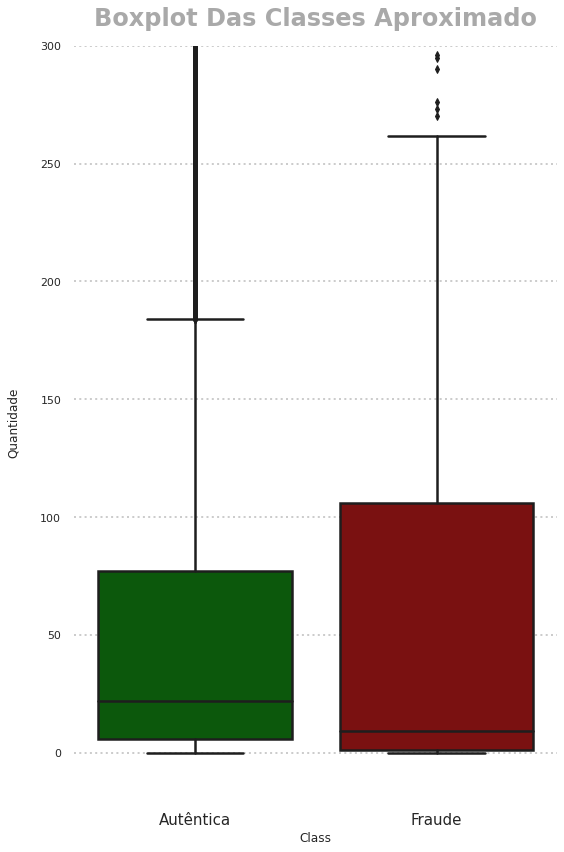

In [ ]:
# boxplot - 2
cor = {classe: "darkgreen" if classe == 0 else "darkred" for classe in base_fraudes_cartao['Class'].unique()}
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,12))

ax = sns.boxplot(x="Class", y="Amount", data=base_fraudes_cartao, palette=cor, linewidth=2.5)

plt.xticks([0, 1], ['Autêntica', 'Fraude'], fontsize=15)
ax.set_title('Boxplot Das Classes Aproximado',fontsize=24, color='darkgray', weight='bold', pad=20)
ax.set_ylim(-20, 300)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(axis='y', linestyle='dotted', linewidth=2)

ax.axes.set_ylabel('Quantidade', labelpad=20);
plt.tight_layout()

A quantidade de *outliers* representa para as transações autênticas 14% de seus dados, já para as fraudulentas esse valor é de aproximadamente 11%. A principio não foi optado por remover esse *outliers*. 

In [ ]:
# retornando a quantidade de linhas acima do limite superior do boxplot(outliers).
base_fraudes = base_fraudes_cartao[base_fraudes_cartao['Class'] == 1]
base_autenticos = base_fraudes_cartao[base_fraudes_cartao['Class'] == 0]

Q1_amount_fraudes =  base_fraudes.Amount.quantile(.25)
Q3_amount_fraudes = base_fraudes.Amount.quantile(.75)

Q1_amount_autenticos =  base_autenticos.Amount.quantile(.25)
Q3_amount_autenticos = base_autenticos.Amount.quantile(.75)

# calulo IQR de price
IQR_amount_fraudes = Q3_amount_fraudes - Q1_amount_fraudes
sup_amount_fraudes = Q3_amount_fraudes + 1.5 * IQR_amount_fraudes

IQR_amount_autenticos = Q3_amount_autenticos - Q1_amount_autenticos
sup_amount_autenticos = Q3_amount_autenticos + 1.5 * IQR_amount_autenticos

quantidade_outliers_fraudes = base_fraudes[base_fraudes['Amount'] > sup_amount_fraudes]
print(f'A quantidade de outliers presente para casos autenticos representão aproximadamente: {(quantidade_outliers_fraudes.shape[0]/base_fraudes.shape[0])*100}%')
quantidade_outliers_autenticos = base_autenticos[base_autenticos['Amount'] > sup_amount_autenticos]
print(f'A quantidade de outliers presente para casos de fraudes representão aproximadamente: {(quantidade_outliers_autenticos.shape[0]/base_autenticos.shape[0])*100}%')

A quantidade de outliers presente para casos autenticos representão aproximadamente: 14.02439024390244%
A quantidade de outliers presente para casos de fraudes representão aproximadamente: 11.206584246346482%


## Preparação dos Dados


A distribuição dos dados para a aprendizagem do algoritmo foi feita seguindo o padrão de distribuição entre dados de treino, validação e de testes.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# https://www.kaggle.com/code/nextbigwhat/train-valid-test-split-instead-of-train-test-split
# divisão dos dados entre treino, validação e teste
df_base = base_fraudes_cartao.copy()
X = df_base.drop('Class', axis=1)
y = df_base['Class']

# 80% treino e 20% restante sera dividido entre validação e teste
X_train, X_rem, y_train, y_rem  = train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)

# 10% para teste e 10% para validação
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0, stratify=y_rem)

# guardando variavel para comparação de matrizes de corelação antes e depois normalização

Se faz nescessario a padronização das colunas `Amount` e `Time` para que modelo não chegue a uma conclusão sob a influência da ordem de grandeza da coluna, e não pela importância da variável em si.

In [ ]:
# padronização/normalizar de Time e Amount
# padronização quando há Outliers -> https://www.udemy.com/course/machine-learning-e-data-science-com-python-y/learn/lecture/26172610#questions
from sklearn.preprocessing import StandardScaler
scaler_fraudes = StandardScaler()

# padronização de treino
X_train['Amount'] = scaler_fraudes.fit_transform(X_train[['Amount']])
X_train['Time'] = scaler_fraudes.fit_transform(X_train[['Time']])

# padronização de validação
X_valid['Amount'] = scaler_fraudes.fit_transform(X_valid[['Amount']])
X_valid['Time'] = scaler_fraudes.fit_transform(X_valid[['Time']])

# padronização de teste
X_test['Amount'] = scaler_fraudes.fit_transform(X_test[['Amount']])
X_test['Time'] = scaler_fraudes.fit_transform(X_test[['Time']])

Devido a grande diferença entre a quantidade de transações autenticas e fraudulentas, foi nescessario utilizar metodos para balancear a base de dados. Em nosso caso optei por utilizar duas principais abordagens para conjunto de dados desbalanceados:
  * ***Undersampling***: Consiste em reduzir o número de observações da classe majoritária para diminuir a diferença entre as categorias.
  * ***Oversampling***: Consiste em criar sinteticamente novas observações da classe minoritária, com o objetivo de igualar a proporção das categorias

### Undersampling

In [ ]:
# under/oversampling apenas no treino -> https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
from imblearn.under_sampling import NearMiss

nm = NearMiss(sampling_strategy='majority')
X_train_near_miss_undersampled, y_train_near_miss_undersampled = nm.fit_resample(X_train, y_train)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(sampling_strategy='majority', random_state=0)
X_train_random_undersampled, y_train_random_undersampled = rus.fit_resample(X_train, y_train)

In [ ]:
# outros -> https://imbalanced-learn.org/stable/under_sampling.html

### Oversampling

In [ ]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=0, sampling_strategy='minority')

X_train_smote_oversampled, y_train_smote_oversampled = sm.fit_resample(X_train, y_train)

### Matriz de correlação

Com os dados balanceados, podemos perceber uma nitida diferença nas correlações entre as características, facilitando a identificação de quais variáveis estão mais fortemente relacionadas entre si. Nesse caso em especifico, utilizei o metodo `RandomUnderSampler` para balancear os dados.

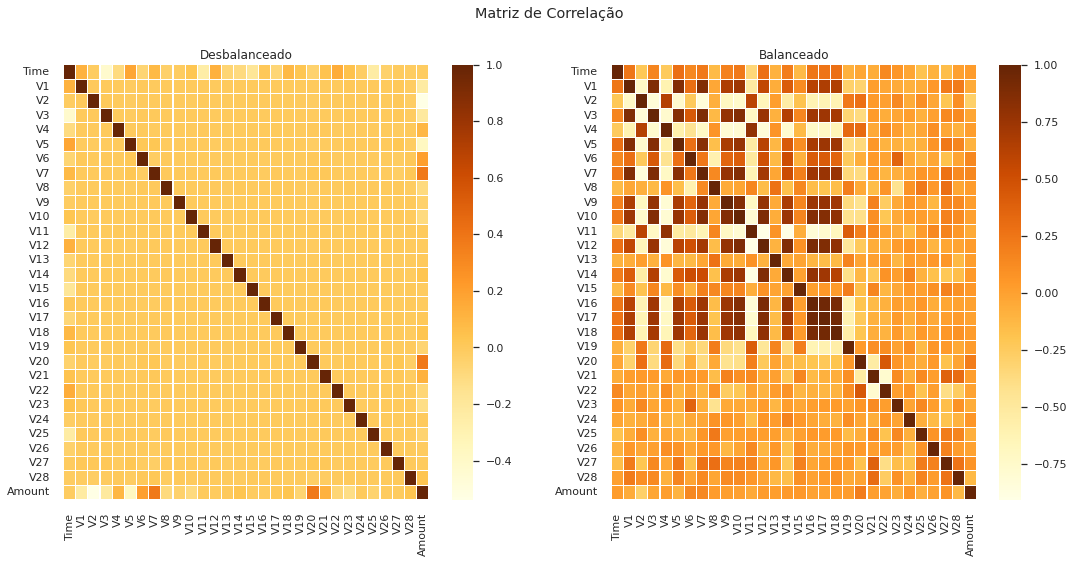

In [ ]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = X_train_random_undersampled.corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="YlOrBr", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="YlOrBr", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

## Modelo de Machine Learning


Devido a esse caso ser um problemas de classificação (transação regular ou fraudulenta) faremos uso dos algortimos de Regressão Logistica, Arvore de Decisão (como tambem *Random Forest*) e tipos especiais de SVM (Máquina de vetores de suporte) para bases com muitos dados.

Tambem usaremos 3 tipos de balanceamentos, sendo eles o *NearMiss*, *RandomUnderSampler* e o SMOTE.

para avaliar o algortimo e testar outros parametros vamos utilizar a metrica de ***AUC ROC***, uma curva de probabilidade que mede a capacidade do modelo de classificar corretamente as classes. Quanto mais próxima de 1 a probabilidade, melhor a precisão do modelo para prever as classes corretamente. Quanto mais próximo de 0, pior o desempenho do modelo. 


ver em 
* https://www.kaggle.com/code/shrijan19/comparing-resampling-techniques-fraud-detection/notebook
e
* discussao sobre o dataset no kangle
* ver tambem:
* https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code?datasetId=310&searchQuery=recall
* https://www.kaggle.com/code/indikab/credit-card-fraud-detection-with-99-9-accuracy

### Regressão Logistica

#### NearMiss Undersampling

In [ ]:
# construção de regressão logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_risco_fraude = LogisticRegression(solver='saga', penalty='l2', random_state=0, max_iter=10000, C=1);
logistic_risco_fraude.fit(X_train_near_miss_undersampled.values, y_train_near_miss_undersampled.values);

previsoes_logistic_risco_fraude = logistic_risco_fraude.predict(X_valid.values)

accuracy_score(y_valid.values, previsoes_logistic_risco_fraude)

0.6188687194972087

In [ ]:
print(classification_report(y_valid, previsoes_logistic_risco_fraude))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     28432
           1       0.00      0.88      0.01        49

    accuracy                           0.62     28481
   macro avg       0.50      0.75      0.39     28481
weighted avg       1.00      0.62      0.76     28481



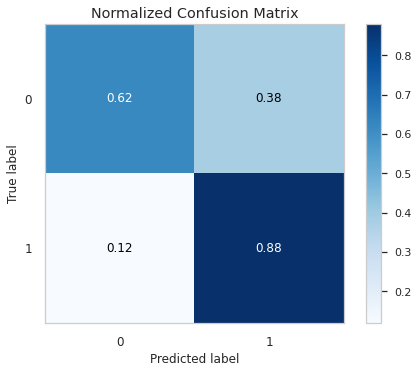

In [ ]:
# plotar a matrix de confusão
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_valid, previsoes_logistic_risco_fraude, normalize=True);

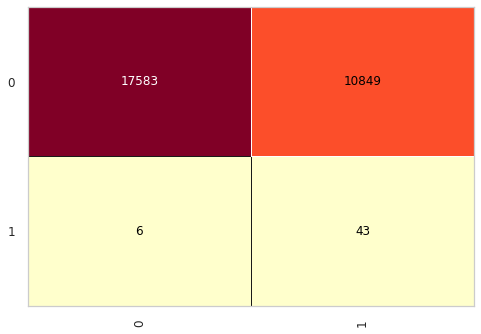

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_risco_fraude);
cm.fit(X_train_near_miss_undersampled.values, y_train_near_miss_undersampled.values);
cm.score(X_valid.values, y_valid.values);

In [ ]:
print(roc_auc_score(y_valid ,previsoes_logistic_risco_fraude))

0.7479869620892814


#### Random Undersampling

In [ ]:
logistic_risco_fraude_random_sample = LogisticRegression(solver='lbfgs', penalty='l2', random_state=0, max_iter=10000, C=1);
logistic_risco_fraude_random_sample.fit(X_train_random_undersampled.values, y_train_random_undersampled.values);

previsoes_logistic_risco_fraude_random_sample = logistic_risco_fraude_random_sample.predict(X_valid.values)

accuracy_score(y_valid.values, previsoes_logistic_risco_fraude_random_sample)

0.9719813208805871

In [ ]:
print(classification_report(y_valid, previsoes_logistic_risco_fraude_random_sample))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     28432
           1       0.05      0.88      0.10        49

    accuracy                           0.97     28481
   macro avg       0.53      0.92      0.54     28481
weighted avg       1.00      0.97      0.98     28481



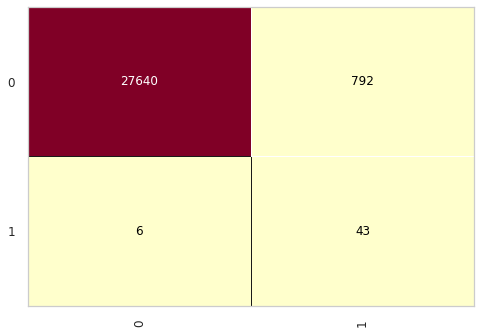

In [ ]:
cm = ConfusionMatrix(logistic_risco_fraude_random_sample);
cm.fit(X_train_random_undersampled.values, y_train_random_undersampled.values);
cm.score(X_valid.values, y_valid.values);

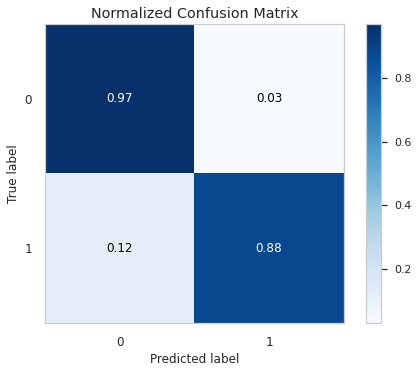

In [ ]:
skplt.metrics.plot_confusion_matrix(y_valid, previsoes_logistic_risco_fraude_random_sample, normalize=True);

In [ ]:
print(roc_auc_score(y_valid ,previsoes_logistic_risco_fraude_random_sample))

0.9248475417178689


#### SMOTE Oversampling

In [ ]:
logistic_risco_fraude_smote_sample = LogisticRegression(solver='lbfgs', penalty='l2', random_state=0, max_iter=10000, C=1);
logistic_risco_fraude_smote_sample.fit(X_train_smote_oversampled.values, y_train_smote_oversampled.values);

previsoes_logistic_risco_fraude_smote_sample = logistic_risco_fraude_smote_sample.predict(X_valid.values)

accuracy_score(y_valid.values, previsoes_logistic_risco_fraude_smote_sample)

0.9753871001720446

In [ ]:
print(classification_report(y_valid, previsoes_logistic_risco_fraude_smote_sample))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.06      0.88      0.11        49

    accuracy                           0.98     28481
   macro avg       0.53      0.93      0.55     28481
weighted avg       1.00      0.98      0.99     28481



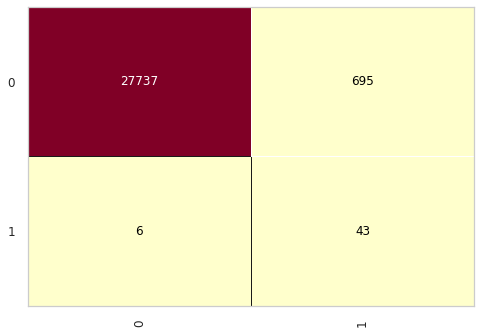

In [ ]:
cm = ConfusionMatrix(logistic_risco_fraude_smote_sample);
cm.fit(X_train_smote_oversampled.values, y_train_smote_oversampled.values);
cm.score(X_valid.values, y_valid.values);

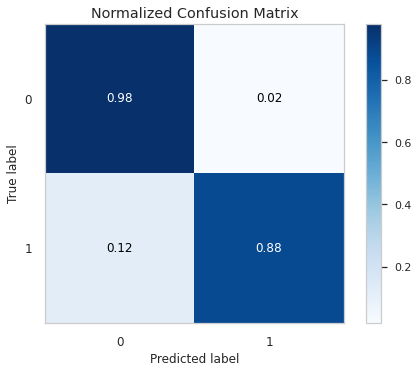

In [ ]:
skplt.metrics.plot_confusion_matrix(y_valid, previsoes_logistic_risco_fraude_smote_sample, normalize=True);

In [ ]:
print(roc_auc_score(y_valid ,previsoes_logistic_risco_fraude_smote_sample))

0.926553366141054


### SVM

#### NearMiss Undersampling

In [ ]:
from sklearn.svm import SVC

svm_risco_fraude_near_miss = SVC(kernel='rbf', random_state=0, C = 2) # 2 -> 4
svm_risco_fraude_near_miss.fit(X_train_near_miss_undersampled.values, y_train_near_miss_undersampled.values);

previsoes_svm_risco_fraude_near_miss = svm_risco_fraude_near_miss.predict(X_valid.values)

accuracy_score(y_valid, previsoes_svm_risco_fraude_near_miss)

0.8087848039043573

In [ ]:
print(classification_report(y_valid, previsoes_svm_risco_fraude_near_miss))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89     28432
           1       0.01      0.84      0.01        49

    accuracy                           0.81     28481
   macro avg       0.50      0.82      0.45     28481
weighted avg       1.00      0.81      0.89     28481



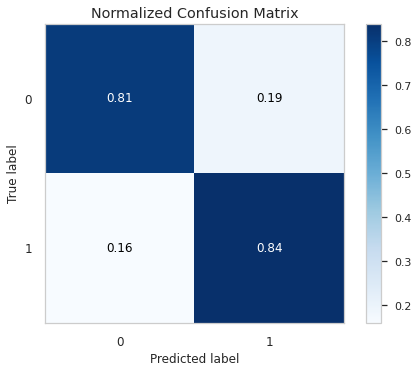

In [ ]:
skplt.metrics.plot_confusion_matrix(y_valid, previsoes_svm_risco_fraude_near_miss, normalize=True);

In [ ]:
print(roc_auc_score(y_valid ,previsoes_svm_risco_fraude_near_miss))

0.8227356643276332


#### Random Undersampling

In [ ]:
svm_risco_fraude_random = SVC(kernel='rbf', random_state=0, C = 1) # 2 -> 4
svm_risco_fraude_random.fit(X_train_random_undersampled.values, y_train_random_undersampled.values);

previsoes_svm_risco_fraude_random = svm_risco_fraude_random.predict(X_valid.values)

accuracy_score(y_valid, previsoes_svm_risco_fraude_random)

0.9859906604402935

In [ ]:
print(classification_report(y_valid, previsoes_svm_risco_fraude_random))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     28432
           1       0.10      0.86      0.17        49

    accuracy                           0.99     28481
   macro avg       0.55      0.92      0.58     28481
weighted avg       1.00      0.99      0.99     28481



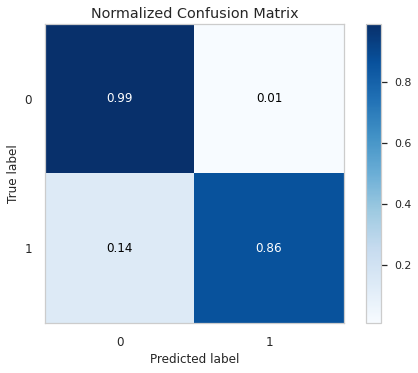

In [ ]:
skplt.metrics.plot_confusion_matrix(y_valid, previsoes_svm_risco_fraude_random, normalize=True);

In [ ]:
print(roc_auc_score(y_valid ,previsoes_svm_risco_fraude_random))

0.9216777876035052


#### SMOTE Oversampling

No caso do balanceamento utilizando a tecnica de SMOTE, optaremos por outras implementações do tipo SVM. Essa a bordagem se da pela quantidade de dados presentes no conjuto atual. na proria documentação do SVM no *sklearn* temos a seguinte observação:

>The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.

-> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

durante a utilização do algoritmo SVM tivemos um tempo medio de 20 min para sua construção. Por isso utilizaremos o ***SGDClassifier***

In [ ]:
from sklearn.linear_model import SGDClassifier

# max_iter=10000, loss='hinge', alpha=0.01  9777..
# max_iter=1000, loss='modified_huber', alpha=0.01  9781..
# max_iter=5000, loss='log', alpha=0.01, random_state=0 9794...

SGDC_risco_fraude_smote = SGDClassifier(max_iter=1000, loss='log', alpha=0.01, random_state=0)
SGDC_risco_fraude_smote.fit(X_train_smote_oversampled.values, y_train_smote_oversampled.values);

previsoes_SGDC_risco_fraude_smote = SGDC_risco_fraude_smote.predict(X_valid.values)

accuracy_score(y_valid, previsoes_SGDC_risco_fraude_smote)

0.9794951019978231

In [ ]:
print(classification_report(y_valid, previsoes_SGDC_risco_fraude_smote))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.07      0.88      0.13        49

    accuracy                           0.98     28481
   macro avg       0.53      0.93      0.56     28481
weighted avg       1.00      0.98      0.99     28481



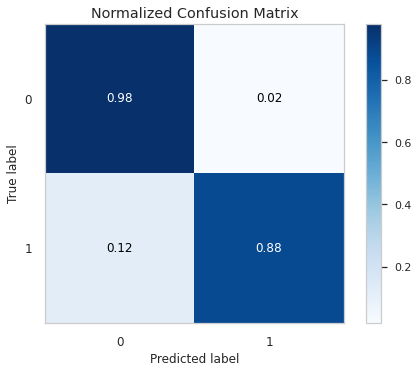

In [ ]:
skplt.metrics.plot_confusion_matrix(y_valid, previsoes_SGDC_risco_fraude_smote, normalize=True);

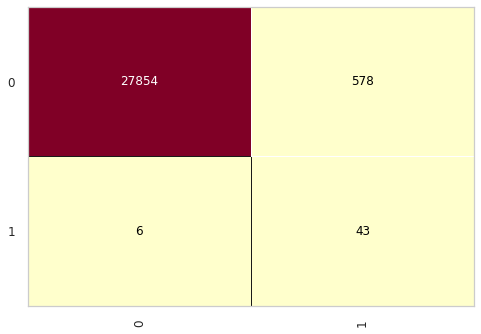

In [ ]:
cm = ConfusionMatrix(SGDC_risco_fraude_smote);
cm.fit(X_train_smote_oversampled.values, y_train_smote_oversampled.values);
cm.score(X_valid.values, y_valid.values);

In [ ]:
print(roc_auc_score(y_valid ,previsoes_SGDC_risco_fraude_smote))

0.9286109069401536


### Decision Tree

#### NearMiss Undersampling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_near_miss = DecisionTreeClassifier(random_state=0)

decision_tree_near_miss.fit(X_train_near_miss_undersampled.values, y_train_near_miss_undersampled.values);

previsoes_decision_tree_near_miss = decision_tree_near_miss.predict(X_valid.values)

accuracy_score(y_valid, previsoes_decision_tree_near_miss)

0.12460938871528388

In [ ]:
print(classification_report(y_valid, previsoes_decision_tree_near_miss))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22     28432
           1       0.00      0.92      0.00        49

    accuracy                           0.12     28481
   macro avg       0.50      0.52      0.11     28481
weighted avg       1.00      0.12      0.22     28481



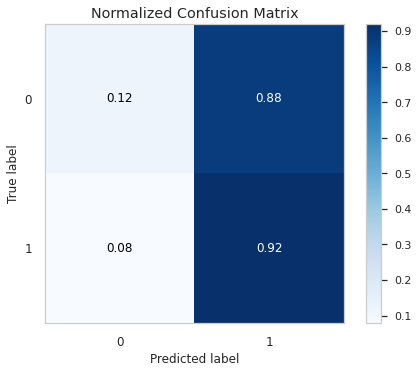

In [ ]:
skplt.metrics.plot_confusion_matrix(y_valid, previsoes_decision_tree_near_miss, normalize=True);

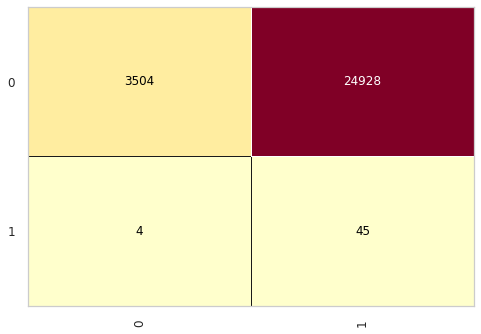

In [ ]:
cm = ConfusionMatrix(decision_tree_near_miss);
cm.fit(X_train_near_miss_undersampled.values, y_train_near_miss_undersampled.values);
cm.score(X_valid.values, y_valid.values);

In [ ]:
print(roc_auc_score(y_valid ,previsoes_decision_tree_near_miss))

0.5208043825296016


#### Random Undersampling

In [ ]:

decision_tree_random_sample = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=0)

decision_tree_random_sample.fit(X_train_random_undersampled.values, y_train_random_undersampled.values);

previsoes_decision_tree_random_sample = decision_tree_random_sample.predict(X_valid.values)

accuracy_score(y_valid, previsoes_decision_tree_random_sample)

0.9709982093325374

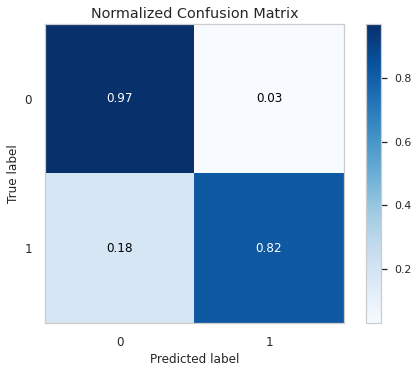

In [ ]:
skplt.metrics.plot_confusion_matrix(y_valid, previsoes_decision_tree_random_sample, normalize=True);

In [ ]:
print(roc_auc_score(y_valid ,previsoes_decision_tree_random_sample))

0.8937956513500166


#### SMOTE Oversampling

In [ ]:
decision_tree_smote = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=0)

decision_tree_smote.fit(X_train_smote_oversampled.values, y_train_smote_oversampled.values);

previsoes_decision_tree_smote = decision_tree_smote.predict(X_valid.values)

accuracy_score(y_valid, previsoes_decision_tree_smote)

0.989396439731751

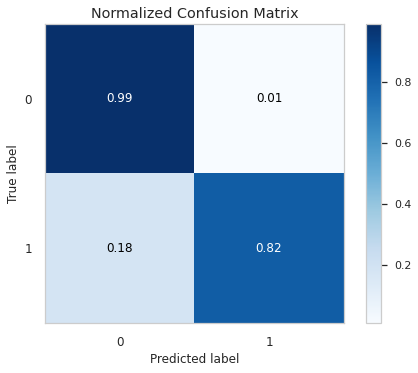

In [ ]:
skplt.metrics.plot_confusion_matrix(y_valid, previsoes_decision_tree_smote, normalize=True);

In [ ]:
print(roc_auc_score(y_valid ,previsoes_decision_tree_smote))

0.9030106203989756


### Random Forest

#### NearMiss Undersampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_near_miss = RandomForestClassifier(max_depth=2, criterion='entropy', random_state=0)
random_forest_near_miss.fit(X_train_near_miss_undersampled.values, y_train_near_miss_undersampled.values)

previsao_random_forest_near_miss = random_forest_near_miss.predict(X_valid.values)

accuracy_score(y_valid, previsao_random_forest_near_miss)

0.6522242898774622

#### Random Undersampling


In [ ]:
random_forest_random_sample = RandomForestClassifier(max_depth=5, criterion='entropy', random_state=0)
random_forest_random_sample.fit(X_train_random_undersampled.values, y_train_random_undersampled.values)

previsao_random_forest_random_sample = random_forest_random_sample.predict(X_valid.values)

accuracy_score(y_valid, previsao_random_forest_random_sample)

0.98504266001896

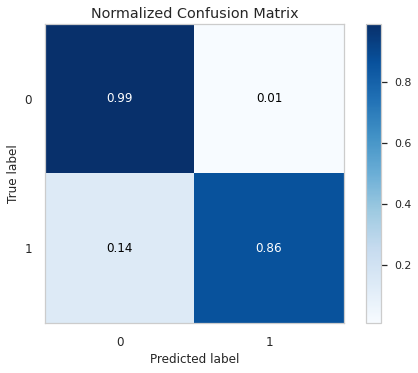

In [ ]:
skplt.metrics.plot_confusion_matrix(y_valid, previsao_random_forest_random_sample, normalize=True);

In [ ]:
print(roc_auc_score(y_valid ,previsao_random_forest_random_sample))

0.9212029704960206


#### SMOTE Oversampling

In [ ]:
random_forest_smote = RandomForestClassifier(max_depth=5, criterion='entropy', random_state=0)

random_forest_smote.fit(X_train_smote_oversampled.values, y_train_smote_oversampled.values);

previsoes_random_forest_smote = random_forest_smote.predict(X_valid.values)

accuracy_score(y_valid, previsoes_random_forest_smote)

0.9976124433833081

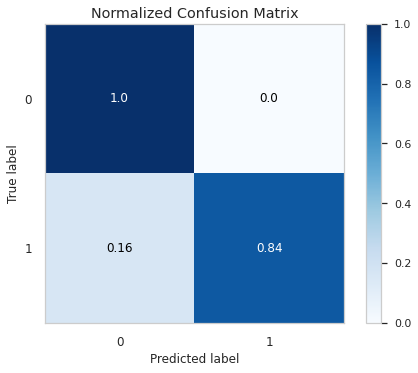

In [ ]:
skplt.metrics.plot_confusion_matrix(y_valid, previsoes_random_forest_smote, normalize=True);

In [ ]:
print(roc_auc_score(y_valid ,previsoes_random_forest_smote))

0.9173121978110321


## Avaliar o desempenho do modelo

Apos o treinamento e validação dos resultados dos algoritmos utilizando as bases de treino e validação, utilizaremos a base de dados de teste para finalmente proceder com à previsão em um conjunto independente que não foi usado antes. Durante a construção dos algoritmos e os ajustes de alguns parametros, foi constatado que o balanceamento utilizando o metodo *NearMiss* apresentou os piores resultados, e nesse caso não foi selecionado para a avaliação final.



### Regressão Logistica

In [ ]:
# Random Undersampling
test_logistic_risco_fraude_random_sample = logistic_risco_fraude_random_sample.predict(X_test.values)

# SMOTE Oversampling
test_logistic_risco_fraude_smote_sample = logistic_risco_fraude_smote_sample.predict(X_test.values)

### SVM

In [ ]:
# Random Undersampling
test_svm_risco_fraude_random = svm_risco_fraude_random.predict(X_test.values)

# SMOTE Oversampling
test_SGDC_risco_fraude_smote = SGDC_risco_fraude_smote.predict(X_test.values)

### Decision Tree

In [ ]:
# Random Undersampling
test_decision_tree_random_sample = decision_tree_random_sample.predict(X_test.values)

# SMOTE Oversampling
test_decision_tree_smote = decision_tree_smote.predict(X_test.values)

### Random Forest

In [ ]:
# Random Undersampling
test_random_forest_random_sample = random_forest_random_sample.predict(X_test.values)

# SMOTE Oversampling
test_random_forest_smote = random_forest_smote.predict(X_test.values)

### Matriz de confusão

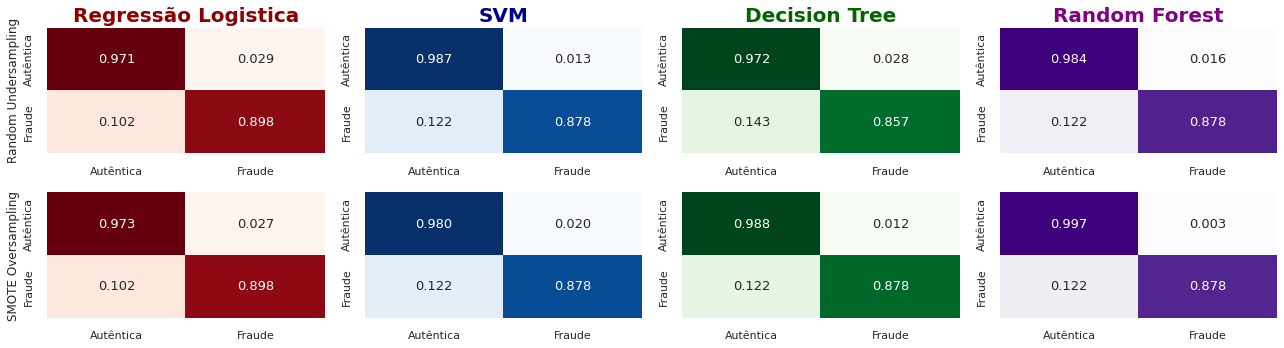

In [ ]:
from sklearn.metrics import confusion_matrix

fig, ((ax1, ax2, ax3, ax4),
      (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(18, 5))

# Confusion Matrix Logistc Regression
ax1.set_title('Regressão Logistica', fontsize=20, color='darkred', weight='bold')
sns.heatmap(confusion_matrix(y_test, test_logistic_risco_fraude_random_sample, normalize='true'),
            cmap='Reds', annot=True, fmt='.3f', cbar=False,
            annot_kws={'size': 13}, xticklabels=['Autêntica','Fraude'],
            yticklabels=['Autêntica','Fraude'], ax=ax1)

ax1.set_ylabel('Random Undersampling')

sns.heatmap(confusion_matrix(y_test, test_logistic_risco_fraude_smote_sample, normalize='true'),
            cmap='Reds', annot=True, fmt='.3f', cbar=False,
            annot_kws={'size': 13}, xticklabels=['Autêntica','Fraude'],
            yticklabels=['Autêntica','Fraude'], ax=ax5)

ax5.set_ylabel('SMOTE Oversampling')

# Confusion Matrix SVM
ax2.set_title('SVM', fontsize=20, color='darkblue', weight='bold')
sns.heatmap(confusion_matrix(y_test, test_svm_risco_fraude_random, normalize='true'),
            cmap='Blues', annot=True, fmt='.3f', cbar=False,
            annot_kws={'size': 13}, xticklabels=['Autêntica','Fraude'],
            yticklabels=['Autêntica','Fraude'], ax=ax2)

sns.heatmap(confusion_matrix(y_test, test_SGDC_risco_fraude_smote, normalize='true'),
            cmap='Blues', annot=True, fmt='.3f', cbar=False,
            annot_kws={'size': 13}, xticklabels=['Autêntica','Fraude'],
            yticklabels=['Autêntica','Fraude'], ax=ax6)

# Confusion Matrix Decision Trees
ax3.set_title('Decision Tree', fontsize=20, color='darkgreen', weight='bold')
sns.heatmap(confusion_matrix(y_test, test_decision_tree_random_sample, normalize='true'),
            cmap='Greens', annot=True, fmt='.3f', cbar=False,
            annot_kws={'size': 13}, xticklabels=['Autêntica','Fraude'],
            yticklabels=['Autêntica','Fraude'], ax=ax3)

sns.heatmap(confusion_matrix(y_test, test_decision_tree_smote, normalize='true'),
            cmap='Greens', annot=True, fmt='.3f', cbar=False,
            annot_kws={'size': 13}, xticklabels=['Autêntica','Fraude'],
            yticklabels=['Autêntica','Fraude'], ax=ax7)

# Confusion Matrix Random Forest
ax4.set_title('Random Forest', fontsize=20, color='purple', weight='bold')
sns.heatmap(confusion_matrix(y_test, test_random_forest_random_sample, normalize='true'),
            cmap='Purples', annot=True, fmt='.3f', cbar=False,
            annot_kws={'size': 13}, xticklabels=['Autêntica','Fraude'],
            yticklabels=['Autêntica','Fraude'], ax=ax4)

sns.heatmap(confusion_matrix(y_test, test_random_forest_smote, normalize='true'),
            cmap='Purples', annot=True, fmt='.3f', cbar=False,
            annot_kws={'size': 13}, xticklabels=['Autêntica','Fraude'],
            yticklabels=['Autêntica','Fraude'], ax=ax8)

fig.tight_layout()
plt.show()

In [ ]:
# AUC-ROC
auc_roc_dados_teste = {
    'tipo_algoritmo': ['Regressão Logistica','Regressão Logistica','SVM','SVM','Decision Tree','Decision Tree','Random Forest','Random Forest'],
    'tipo_balanceamento': ['Random Undersampling','SMOTE Oversampling','Random Undersampling','SMOTE Oversampling','Random Undersampling','SMOTE Oversampling','Random Undersampling'
    ,'SMOTE Oversampling'],
    'valor': [roc_auc_score(y_test, test_logistic_risco_fraude_random_sample),roc_auc_score(y_test, test_logistic_risco_fraude_smote_sample),
              roc_auc_score(y_test, test_svm_risco_fraude_random),roc_auc_score(y_test, test_SGDC_risco_fraude_smote),
              roc_auc_score(y_test, test_decision_tree_random_sample), roc_auc_score(y_test, test_decision_tree_smote),
              roc_auc_score(y_test, test_random_forest_random_sample), roc_auc_score(y_test, test_random_forest_smote)]
}

auc_roc_dados_treino = {
    'tipo_algoritmo': ['Regressão Logistica','Regressão Logistica','SVM','SVM','Decision Tree','Decision Tree','Random Forest','Random Forest'],
    'tipo_balanceamento': ['Random Undersampling','SMOTE Oversampling','Random Undersampling','SMOTE Oversampling','Random Undersampling','SMOTE Oversampling','Random Undersampling'
    ,'SMOTE Oversampling'],
    'valor': [roc_auc_score(y_valid, previsoes_logistic_risco_fraude_random_sample),roc_auc_score(y_valid, previsoes_logistic_risco_fraude_smote_sample),
              roc_auc_score(y_valid, previsoes_svm_risco_fraude_random),roc_auc_score(y_valid, previsoes_SGDC_risco_fraude_smote),
              roc_auc_score(y_valid, previsoes_decision_tree_random_sample), roc_auc_score(y_valid, previsoes_decision_tree_smote),
              roc_auc_score(y_valid, previsao_random_forest_random_sample), roc_auc_score(y_valid, previsoes_random_forest_smote)]
}

df_auc_roc_dados_teste = pd.DataFrame(auc_roc_dados_teste)
df_auc_roc_dados_treino = pd.DataFrame(auc_roc_dados_treino)

In [ ]:
# Valores AUC-ROC para dados de teino/validação
df_auc_roc_dados_treino.sort_values(by='valor', ascending=False)

,tipo_algoritmo,tipo_balanceamento,valor
3,SVM,SMOTE Oversampling,0.928611
1,Regressão Logistica,SMOTE Oversampling,0.926553
0,Regressão Logistica,Random Undersampling,0.924848
2,SVM,Random Undersampling,0.921678
6,Random Forest,Random Undersampling,0.921203
7,Random Forest,SMOTE Oversampling,0.917312
5,Decision Tree,SMOTE Oversampling,0.903011
4,Decision Tree,Random Undersampling,0.893796


In [ ]:
# Valores AUC-ROC para dados de teste
df_auc_roc_dados_teste.sort_values(by='valor', ascending=False)

,tipo_algoritmo,tipo_balanceamento,valor
7,Random Forest,SMOTE Oversampling,0.937457
1,Regressão Logistica,SMOTE Oversampling,0.935351
0,Regressão Logistica,Random Undersampling,0.934454
5,Decision Tree,SMOTE Oversampling,0.932990
2,SVM,Random Undersampling,0.932339
6,Random Forest,Random Undersampling,0.930827
3,SVM,SMOTE Oversampling,0.928681
4,Decision Tree,Random Undersampling,0.914802


In [ ]:
best_ml = df_auc_roc_dados_teste.iloc[df_auc_roc_dados_teste['valor'].idxmax()]
print(f'O melhor algoritmo encontrado durante o exemplo de teste foi o {best_ml[0]}, com um balanceamento do tipo {best_ml[1]}.O valor encontrado para AUC_ROC foi de {best_ml[2]}')

O melhor algoritmo encontrado durante o exemplo de teste foi o Random Forest, com um balanceamento do tipo SMOTE Oversampling.O valor encontrado para AUC_ROC foi de 0.9374565737944024


## Conclusão


O projeto utilizado como estudo inicial dos algoritmos de classificação de ***machine learning***, se refere a verificação de transações autenticas e falsas por compras nos cartões de creditos, assunto de extrema importancia para as instituição financeira. Se utilizando de um algortimo de *machine learning* podemos aumentar a eficiência na detecções de transações fraudulentas, sem comprometer de maneira significativa as autenticas.

O *dataset* utilizado possuia uma base de dados bastante desbalanceada, com a grande maioria dos transações sendo marcadas como auntenticas, o que poderia causar um vies no aprendizado do algoritmo. Dessa maneira foi proposto tecnicas de balanceamento, como tambem divisão da base de dados entre treino, validação e teste, para assim evitar vazamento de dados, e consequentemente um vies no algoritmo.

Para verificação da qualidade do algoritmo, utilizamos uma matriz de confusão juntamente com o indice de área sobre a curva (**AUC-ROC**). Esse indice informa o quanto o modelo é capaz de distinguir entre as classes. Quanto maior a AUC, melhor o modelo é para prever 0 classes como 0 e 1 classes como 1.

Construindo, treinando e validando os algoritmos, o melhor valor encontrado foi **0.928611** para o algoritmo **SVM**, utilizando o balanceamento SMOTE Oversampling.

Contudo nos dados de teste, o melhor valor encontrado para o indice AUC-ROC foi de **0.937457** para o algoritmo ***Random Forest***, utilizando o balanceamento SMOTE Oversampling, enquanto o SVM teve um valor de **0.928681**. A diferença foi de aproximadamente **0.9%**.

O algoritmo Random Forest teve taxa de acerto para casos **autenticos** de aproximadamente **99,7%**, enquanto para casos de fraudes de aproximadamente **87,8%**.

É importante destacar que ainda a espaços para aprimoramentos e melhorias na detecção de fraudes, e que nesse caso o intuito foi apenas um exemplo pratico de construção e tratamento de ML, não uma busca minuciosa do melhor algortimo e parametros